<a href="https://colab.research.google.com/github/fuyu-quant/Data_Science/blob/main/Tabel_Data/AutoML/ScikitAllstars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ScikitAllstars
* scikit-learnの主要な教師あり学習モデルをまとめてoptunaでハラパーパラメータのチューニングをするツール

In [ ]:
%%capture
!pip install optuna

In [2]:
!pip install git+https://github.com/maskot1977/scikitallstars.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/maskot1977/scikitallstars.git to /tmp/pip-req-build-l1vrae4a
  Running command git clone -q https://github.com/maskot1977/scikitallstars.git /tmp/pip-req-build-l1vrae4a
  Created wheel for scikitallstars: filename=scikitallstars-0.1.0-py3-none-any.whl size=19559 sha256=60f4e67442e450efa7f8e7f2b190dcd76baad861e8f57ae9f9b407d3b867f6ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-l961wznr/wheels/5b/41/c0/e13b7f310af0e2efd79680825d16970167a7fccb54ee86a155
Successfully built scikitallstars


In [22]:
# scikitallstars
from scikitallstars import allstars, depict
from scikitallstars import stacking

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [6]:
red_wine = pd.read_csv('https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt', sep='\t', index_col=0) 
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
X_train, X_test, y_train, y_test = train_test_split(red_wine.iloc[:, :-1].values, red_wine.iloc[:, [-1]].values, test_size= 0.3, random_state=3655) 

## ScikitAllstars

### ScikitAllstarsの学習

In [ ]:
allstars_model = allstars.fit(X_train, y_train, timeout=100, n_trials=100, feature_selection=True)

### ScikitAllstarsの推論

In [23]:
y_pred = allstars_model.predict(X_test)
y_pred

array([5.59383123, 6.52963101, 5.54874353, 5.48019859, 5.31544228,
       5.75445842, 5.52552614, 5.07966246, 6.0671351 , 5.41798724,
       5.61291941, 6.7292202 , 5.63973352, 6.74355269, 6.51943986,
       5.81144046, 6.27111718, 5.66333089, 5.63632937, 5.72140884,
       4.99708591, 4.82902097, 4.92908907, 4.9632164 , 4.50091594,
       5.41659169, 6.97313287, 5.13165488, 5.38764689, 4.79032952,
       6.34528681, 5.97076653, 6.19495614, 5.09913855, 6.73430223,
       5.6405049 , 5.15309469, 5.93452381, 5.47118599, 6.15957829,
       6.11902403, 6.71990577, 6.84589549, 5.87383032, 5.72686656,
       5.11877869, 4.81640477, 6.12135189, 6.70492209, 5.20121326,
       4.93211651, 5.68819306, 5.13893176, 5.01996414, 5.44732406,
       6.01155123, 6.60521505, 5.75470119, 6.46534363, 5.42021741,
       5.40342708, 6.23465   , 4.71160084, 5.76865351, 6.24467744,
       4.81640477, 5.25668621, 6.04829151, 5.98407386, 5.82857427,
       5.06124409, 5.09177625, 6.36556324, 5.07387196, 4.81674

### 特徴量重要度の可視化

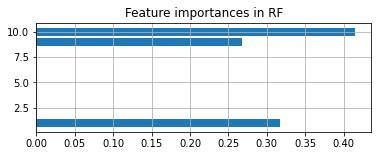

In [18]:
depict.feature_importances(allstars_model)

### 学習の過程

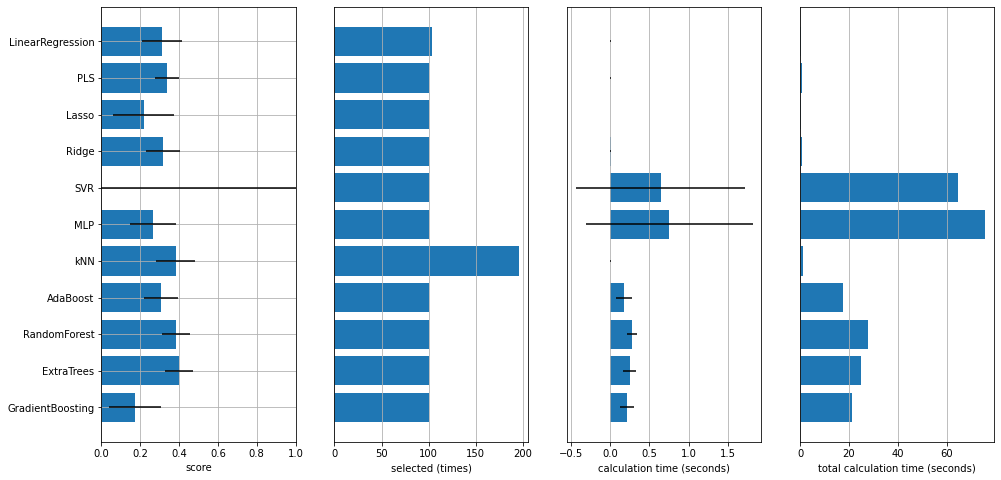

In [19]:
depict.training_summary(allstars_model)

## 精度の高いモデルの確認

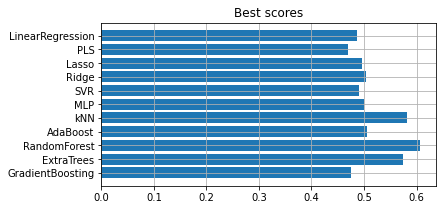

In [20]:
depict.best_scores(allstars_model)

全てのモデルでの学習結果

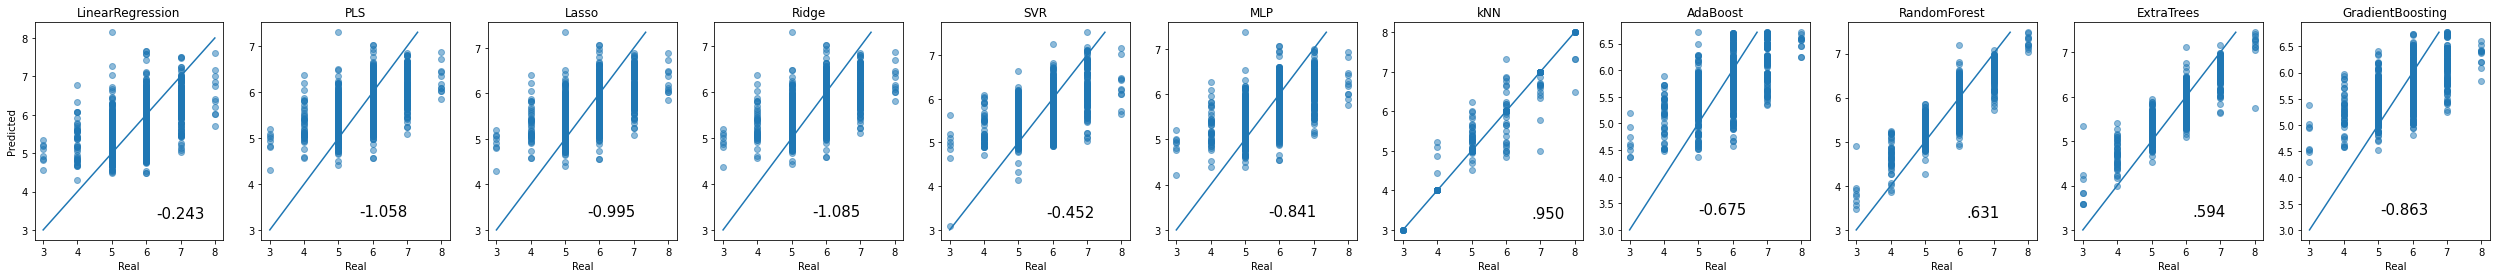

In [21]:
depict.all_metrics(allstars_model, X_train, y_train)

### ベストスコアの出力

In [14]:
# ベストスコアの出力
allstars_model.score(X_train, y_train), allstars_model.score(X_test, y_test)

(0.6306698712310637, -0.25825204580499417)

### 最も精度の高いモデルの学習結果

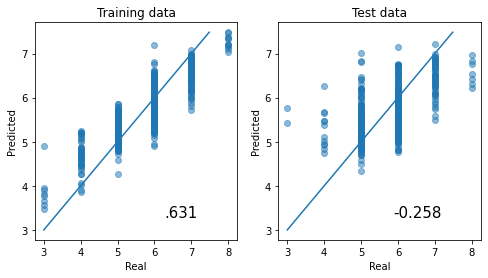

In [15]:
depict.metrics(allstars_model, X_train, y_train, X_test, y_test)

## ScikitAllstars StackingModel

### ScikitAllstars StackingModelの学習

In [ ]:
stacking_model = stacking.get_best_stacking(allstars_model, X_train, y_train, timeout=1000, n_trials=100)

### stackingのベストモデルの推論

In [26]:
stacking_model.predict(X_test)

array([5.16723622, 6.4725479 , 5.67917079, 5.59915097, 5.51183382,
       5.37225116, 5.52141961, 5.02546113, 6.03162168, 5.20582649,
       5.28881102, 6.319252  , 5.56416079, 6.37996055, 6.5449096 ,
       5.57394594, 6.23597893, 5.83110567, 5.49840938, 5.48603013,
       5.12162905, 5.06590441, 5.00137147, 5.12483158, 5.01887878,
       5.18544389, 6.81903418, 5.13829193, 5.22871621, 5.22411641,
       6.49613523, 5.89921182, 5.95612076, 5.3625384 , 6.41973046,
       5.48846033, 5.19803896, 6.39285302, 6.12756649, 6.49486046,
       6.75      , 6.48301896, 6.7992643 , 5.88999833, 5.41594467,
       5.44547581, 4.84999331, 6.30968048, 6.50361145, 5.59574873,
       4.96651565, 5.30462118, 5.14466754, 5.13534086, 5.43219104,
       5.54915155, 6.62574917, 5.52105557, 6.25756061, 5.35548872,
       5.73126087, 7.0548205 , 5.01864338, 5.37685165, 6.40316434,
       4.67440968, 5.59691321, 6.17636584, 6.53461536, 5.72541028,
       5.19471369, 5.12404984, 6.66258639, 5.32459023, 4.93141

### 特徴量重要度の可視化

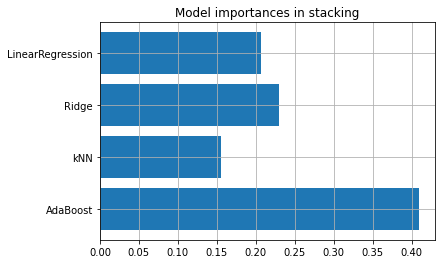

In [27]:
depict.model_importances(stacking_model)

### stackingモデルの出力

In [28]:
stacking_model.score(X_train, y_train), stacking_model.score(X_test, y_test)

(0.6076829383865938, 0.3310623506386293)

### 学習の結果

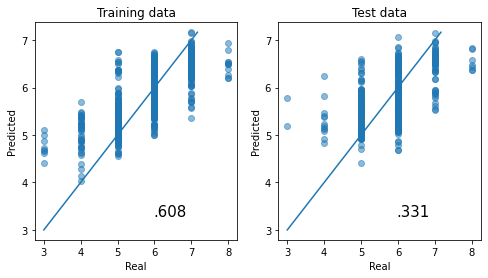

In [29]:
depict.metrics(stacking_model, X_train, y_train, X_test, y_test)